# Homework 1 (compulsory + bonus)

- de modificat pe parcursul semestrului ( strassen sa mearga nu doar cu matrici de size multiplu de 2)

***
## Problem 1
***

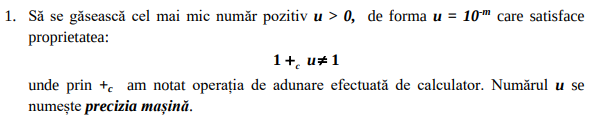

***
### Problem 1 - Solution
***

In [6]:
# Searching for the first number that doesnt hold the inequality: 1 + u != 1

def machinePrecision():
    u = 10
    m = 1
    while 1 + u != 1:
        u = pow(10, -m)
        m += 1
    return u

def machinePrecision2():
    u = 10
    m = 1
    while 1 + u != 1:
        u = pow(10, -m)
        m += 1
    return u/10

print(machinePrecision())

1e-16


***
### Problem 1 - Graphical Interface
***

In [2]:
from tkinter import *

root = Tk()
root.geometry("300x300")
root.title(" Try it yourself! ")

def Take_input():
	INPUT = inputtxt.get("1.0", "end-1c")
	print(INPUT)
	if(1 + 10**(-int(INPUT)) != 1):
		Output.insert(END, 'FALSE')
	else:
		Output.insert(END, "TRUE")
	
l = Label(text = "Guess a value for m so that 1 + u != 1 \n ,where u = 10^-m")
inputtxt = Text(root, height = 10,
				width = 25,
				bg = "light yellow")

Output = Text(root, height = 5,
			width = 25,
			bg = "light cyan")

Display = Button(root, height = 2,
				width = 20,
				text ="Show",
				command = lambda:Take_input())

l.pack()
inputtxt.pack()
Display.pack()
Output.pack()

mainloop()


15

16



***
## Problem 2
***

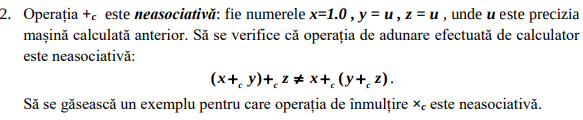

***
### Problem 2 - Solution
***

In [22]:
def check_non_associativity_Sum(x, y, z):
    print(f'x = {x}, y={y}, z={z}')

    isNotAssociative = (x + y) + z != x + (y + z)

    print("The inequation '(x + y) + z != x + (y + z)' returns ", isNotAssociative)
    
    if(isNotAssociative):
        print("On these numbers, the machine addition is not associative.")
    else:
        print("On these numbers, the machine addition is associative.")
    print()

def check_non_associativity_Multiplication(a, b, c):
    print(f'x = {x}, y={y}, z={z}')

    isNotAssociative = (x * y) * z != x * (y * z)

    print("The inequation '(x * y) * z != x * (y * z)' returns ", isNotAssociative)
    
    if(isNotAssociative):
        print("On these numbers, the machine multiplication is not associative.")
    else:
        print("On these numbers, the machine multiplication is associative.")
    print()

x = 1.0
y = 10 ** (-15) #machinePrecision()
z = y
check_non_associativity_Sum(x, y, z)

x = 6
y = 10 ** -1
z = 10 ** (-15)
check_non_associativity_Multiplication(x, y, z)

x = 1.0, y=1e-15, z=1e-15
The inequation '(x + y) + z != x + (y + z)' returns  True
On these numbers, the machine addition is not associative.

x = 6, y=0.1, z=1e-15
The inequation '(x * y) * z != x * (y * z)' returns  True
On these numbers, the machine multiplication is not associative.



***
## Problem 3
***

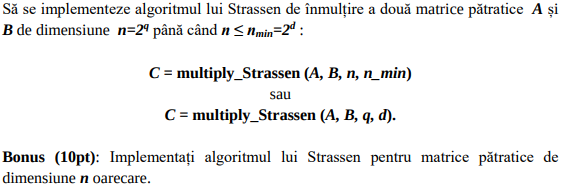

***
### Problem 3 - Solution
***

In [4]:
import numpy as np
 
def split(matrix):
    row, col = matrix.shape
    row2, col2 = row//2, col//2
    return matrix[:row2, :col2], matrix[:row2, col2:], matrix[row2:, :col2], matrix[row2:, col2:]
 
def strassen(x, y):
    # Base case when size of matrices is 1x1
    if len(x) == 1:
        return x * y
 
    # Splitting the matrices into quadrants.
    a, b, c, d = split(x)
    e, f, g, h = split(y)
 
    # Computing the 7 products, recursively (p1, p2...p7)
    p1 = strassen(a, f - h) 
    p2 = strassen(a + b, h)       
    p3 = strassen(c + d, e)       
    p4 = strassen(d, g - e)       
    p5 = strassen(a + d, e + h)       
    p6 = strassen(b - d, g + h) 
    p7 = strassen(a - c, e + f) 
 
    # Computing the values of the 4 quadrants of the final matrix c
    c11 = p5 + p4 - p2 + p6 
    c12 = p1 + p2          
    c21 = p3 + p4           
    c22 = p1 + p5 - p3 - p7 
 
    # Combining the 4 quadrants into a single matrix by stacking horizontally and vertically.
    c = np.vstack((np.hstack((c11, c12)), np.hstack((c21, c22))))
 
    return c

def generateRandomMatrix(n):
    return np.random.randint(100, size=(n, n))

if __name__ == "__main__":
    # A = np.array([[1,2,3,6],
    #             [3,4,5,8],
    #             [7,8,9,2],
    #             [1,2,3,4]
    #             ])
    # B = np.array([[5,6,7,1],
    #               [7,8,7,2],
    #               [8,9,3,5],
    #               [1,2,3,4]])

    n = 16

    A = generateRandomMatrix(n) 
    B = generateRandomMatrix(n)


    print(strassen(A, B))
    print()
    print(np.matmul(A, B)) # print(A @ B)

[[37092 43698 41370 39401 38317 45419 49547 38387 38684 50504 32455 44881
  44067 35490 41871 31897]
 [28531 39026 36077 29589 24579 43339 33170 41002 27898 37969 24242 34792
  38361 25509 27697 29045]
 [33944 42351 38484 38328 35085 40293 44489 40965 35336 39183 28422 35536
  34046 35648 38173 29126]
 [33821 34878 37955 32521 31795 39310 38779 37295 32342 45273 25553 38207
  40538 27493 36685 31958]
 [40397 45300 46419 42779 36888 53987 48554 43395 42650 49992 35210 44653
  48970 38875 39982 33585]
 [50374 43262 48756 41983 42110 49213 48349 38129 40151 50670 37463 43898
  56298 35241 47224 38866]
 [46988 49154 49460 46084 39990 52490 51580 40504 42036 56147 38188 44790
  55841 36405 47324 39212]
 [48265 62252 56424 50885 45645 61279 59600 54124 46127 63583 40288 53507
  57674 39628 55709 46453]
 [34589 40566 34893 34677 32191 34640 35964 28690 34509 38347 27049 33389
  44407 23474 36975 25900]
 [37096 46692 44056 37980 33917 45328 43926 41778 37133 49486 34793 42560
  46528 33360 372